<a href="https://colab.research.google.com/github/Ananassio/Data-Minig-Lab/blob/main/Week_11/Assignment_LSTM_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment review sentiment classification with LSTM 

We use a [data set of annotated move reviews](https://ai.stanford.edu/~amaas/data/sentiment/) from [IMDB](https://www.imdb.com/) to predict the sentiment of a text review. 

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words - you can change this
maxlen = 200  # Only consider the first 200 words of each movie review - you can cahge this
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Flatten, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.datasets import imdb

## Load the IMDB movie review sentiment data

In [2]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step
25000 Training sequences
25000 Validation sequences


In [4]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_vector_length, input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           640000    
                                                                 
 dropout_2 (Dropout)         (None, 200, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 657,025
Trainable params: 657,025
Non-tr

In [5]:
train_history = model.fit(x_train, y_train, batch_size=32,
                          epochs=10, verbose=2,
                          validation_split=0.2)

Epoch 1/10
625/625 - 42s - loss: 0.4033 - accuracy: 0.8113 - val_loss: 0.3081 - val_accuracy: 0.8746 - 42s/epoch - 67ms/step
Epoch 2/10
625/625 - 32s - loss: 0.2100 - accuracy: 0.9209 - val_loss: 0.3083 - val_accuracy: 0.8732 - 32s/epoch - 51ms/step
Epoch 3/10
625/625 - 28s - loss: 0.1386 - accuracy: 0.9484 - val_loss: 0.3661 - val_accuracy: 0.8610 - 28s/epoch - 45ms/step
Epoch 4/10
625/625 - 29s - loss: 0.0872 - accuracy: 0.9682 - val_loss: 0.4702 - val_accuracy: 0.8544 - 29s/epoch - 46ms/step
Epoch 5/10
625/625 - 28s - loss: 0.0668 - accuracy: 0.9775 - val_loss: 0.5221 - val_accuracy: 0.8490 - 28s/epoch - 45ms/step
Epoch 6/10
625/625 - 28s - loss: 0.0529 - accuracy: 0.9818 - val_loss: 0.5082 - val_accuracy: 0.8520 - 28s/epoch - 44ms/step
Epoch 7/10
625/625 - 28s - loss: 0.0372 - accuracy: 0.9875 - val_loss: 0.5713 - val_accuracy: 0.8640 - 28s/epoch - 45ms/step
Epoch 8/10
625/625 - 28s - loss: 0.0451 - accuracy: 0.9844 - val_loss: 0.5908 - val_accuracy: 0.8574 - 28s/epoch - 44ms/step


In [6]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

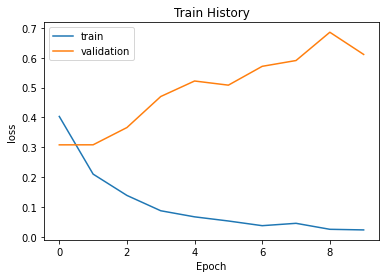

In [7]:
show_train_history(train_history,'loss','val_loss')

In [8]:
scores = model.evaluate(x_val, y_val, verbose=1)
scores[1]

782/782 [==============================] - 11s 14ms/step - loss: 0.6797 - accuracy: 0.8359


0.8358799815177917

In [9]:
predict=model.predict(x_val)
predict=predict.reshape(len(x_val))

782/782 [==============================] - 9s 11ms/step


In [10]:
def get_original_text(i):
    word_to_id = imdb.get_word_index()
    word_to_id = {k:(v+3) for k,v in word_to_id.items()}
    word_to_id[""] = 0
    word_to_id[""] = 1
    word_to_id[""] = 2

    id_to_word = {value:key for key,value in word_to_id.items()}
    return ' '.join(id_to_word[id] for id in x_val[i])

In [11]:
SentimentDict={1:'positive', 0:'negative'}
def display_test_sentiment(i):
    print(get_original_text(i))
    print('label: ', SentimentDict[y_val[i]], ', prediction: ', SentimentDict[predict[i]])

In [12]:
display_test_sentiment(3)

1641221/1641221 [==============================] - 0s 0us/step


KeyError: ignored

In [ ]:
display_test_sentiment(13000)